In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read the dataset
phis = pd.read_csv('Website Phishing.csv')
phis.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,1,0
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,1,0


In [3]:
phis.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,-0.113821,0.114560
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.954773,0.318608
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
phis.shape

(1353, 10)

<Axes: xlabel='Result', ylabel='count'>

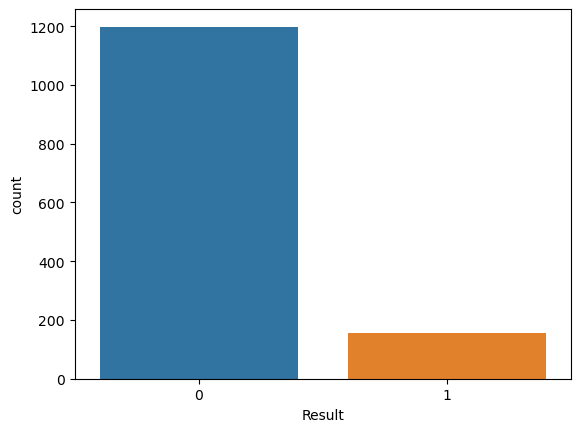

In [5]:
sns.countplot(x=phis['Result'])

In [6]:
 phis['Result'].value_counts()

0    1198
1     155
Name: Result, dtype: int64

In [8]:
# Define feature columns and target column
feature_cols = ['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL','URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain','having_IP_Address']
target_col = ['Result']

In [9]:
# Split the dataset into features (X) and target (y)
X = phis[feature_cols]
y = phis[target_col]
y = y.values.ravel()

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [11]:
 # Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [12]:
# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

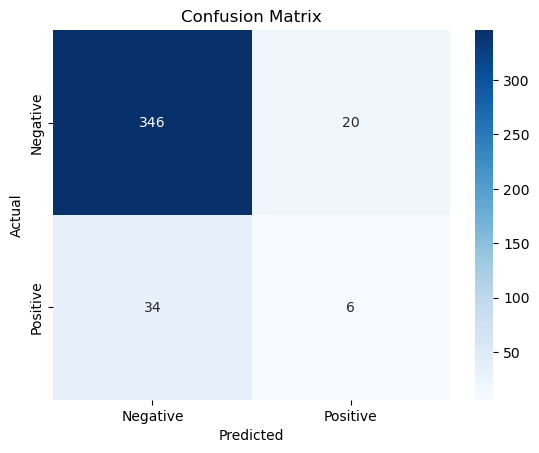

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       366
           1       0.23      0.15      0.18        40

    accuracy                           0.87       406
   macro avg       0.57      0.55      0.55       406
weighted avg       0.84      0.87      0.85       406



In [15]:
# Display confusion matrix as heatmap
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

In [16]:
# Extract confusion matrix elements
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[346  20]
 [ 34   6]]


In [17]:
# Print confusion matrix elements
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 346
False Positives: 20
False Negatives: 34
True Positives: 6


In [18]:
accuracy = clf.score(X_test, y_test)
error_rate = (fp + fn) / (tn + fp + fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)

In [19]:
 # Print evaluation metrics
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

Accuracy: 0.8669950738916257
Error Rate: 0.1330049261083744
Sensitivity: 0.15
Specificity: 0.9453551912568307
False Positive Rate: 0.0546448087431694


In [20]:
# Get feature importances
feature_imp = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)

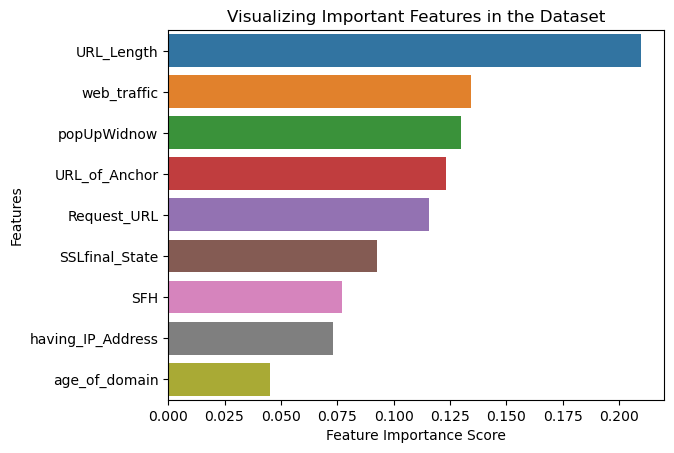

In [21]:
# Visualize feature importances
plt.figure()
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features in the Dataset")
plt.show()